# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

In [4]:
ID = 277634430
sectors = np.array([10,11,12,37,38])

period = 2.326021413
tdepth = 0.0027662917009776333

lc_file = "TOI_771_S10_11_12_37_38.csv"
contrastcurve_file = "TOI_771_SOAR.csv"

band = 'TESS'

# Downloading & Visualizing Data

In [5]:
target = tr.target(ID=ID, sectors=sectors)

C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_10596\1302070754.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap10, ap11, ap12, ap37, ap38])


Sector 10


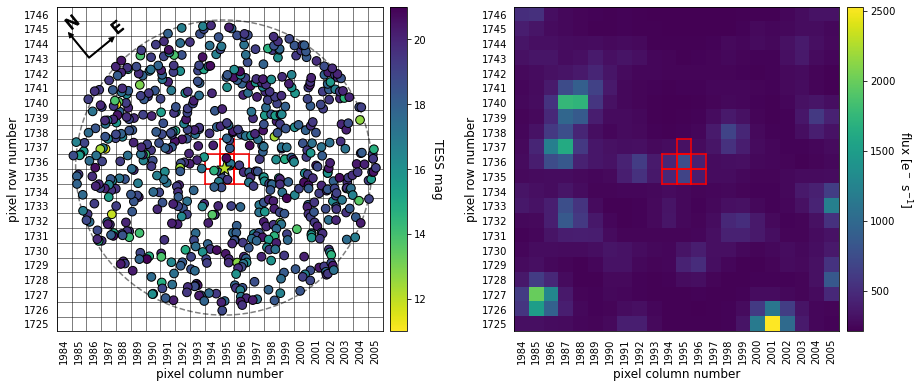

Sector 11


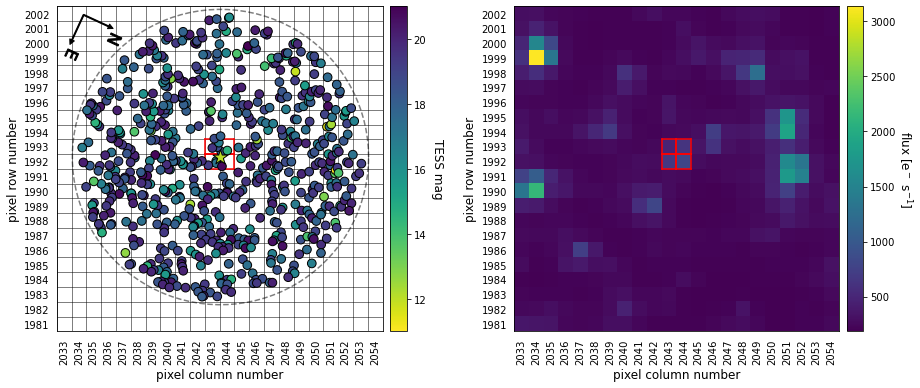

Sector 12


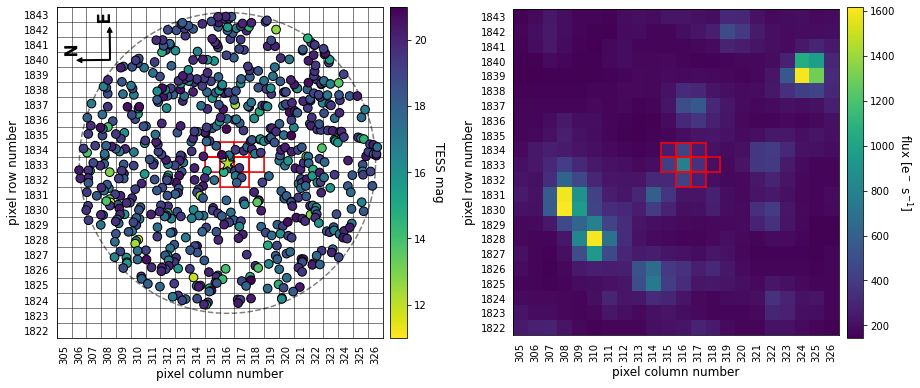

Sector 37


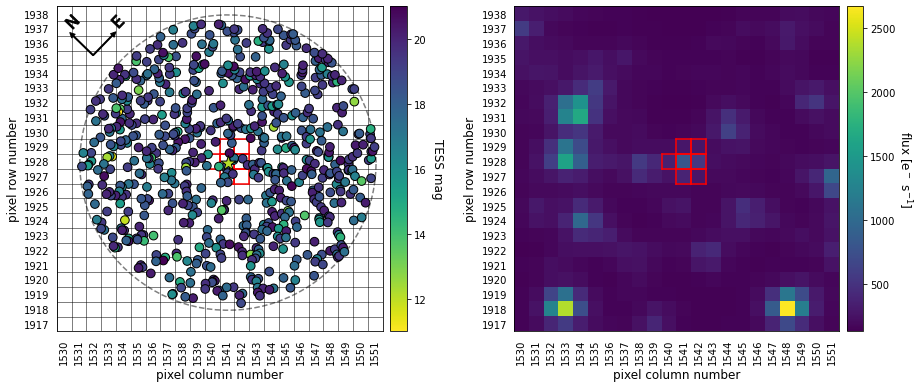

Sector 38


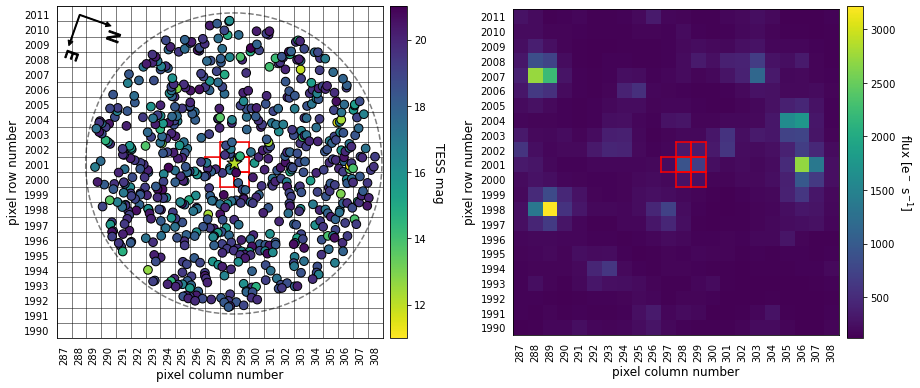

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,277634430,12.0874,10.507,9.955,9.664,164.113310,-72.984845,0.2121,0.241857,3306.0,39.530000,0.000,0.000
1,905653466,18.2584,NaN,NaN,NaN,164.106197,-72.985437,0.9100,0.550585,5301.0,0.328791,7.790,254.118
2,277634428,16.0217,15.202,14.702,14.470,164.120704,-72.985699,1.0300,0.878309,5759.0,0.572599,8.375,111.544
3,905653423,17.1670,NaN,NaN,NaN,164.123277,-72.985388,NaN,NaN,NaN,1.417080,10.681,100.562
4,905653425,20.7845,NaN,NaN,NaN,164.123924,-72.982750,NaN,NaN,NaN,NaN,13.487,56.018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,905653914,19.1345,NaN,NaN,NaN,164.041244,-72.932893,NaN,NaN,NaN,-0.095636,201.889,337.843
641,905653182,19.1079,NaN,NaN,NaN,164.260611,-73.020779,NaN,NaN,5436.0,0.010840,201.903,129.916
642,905653584,19.0539,NaN,NaN,NaN,164.298441,-72.999614,0.6200,0.639165,3966.0,0.395074,202.066,105.344
643,905653652,18.0812,NaN,NaN,NaN,164.296343,-72.968052,1.0400,0.869151,5810.0,-0.048484,202.159,72.688


In [6]:
ap10 = np.array([[1994,1735], [1995,1735],[1996,1735],[1994,1736],
                 [1995,1736], [1996,1736],[1995,1737]])

ap11 = np.array([[2043, 1992],[2044, 1992],[2043, 1993],[2044, 1993]])

ap12 = np.array([[316, 1832],[317, 1832],[315, 1833],[316, 1833],
                 [317, 1833],[318, 1833],[315, 1834],[316, 1834],
                 [317, 1834]])

ap37 = np.array([[1541, 1927],[1542, 1927],[1540, 1928],[1541, 1928],
                 [1542, 1928],[1541, 1929],[1542, 1929]])

ap38 = np.array([[298, 2000],[299, 2000],[297, 2001],[298, 2001],
                 [299, 2001],[298, 2002],[299, 2002]])

apertures = np.array([ap10, ap11, ap12, ap37, ap38])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

# Check Nearby Region

In [7]:
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,277634430,12.0874,10.507,9.955,9.664,164.113310,-72.984845,0.2121,0.241857,3306.0,39.530000,0.000,0.000,8.357131e-01,0.003310
1,905653466,18.2584,NaN,NaN,NaN,164.106197,-72.985437,0.9100,0.550585,5301.0,0.328791,7.790,254.118,2.707362e-03,0.000000
2,277634428,16.0217,15.202,14.702,14.470,164.120704,-72.985699,1.0300,0.878309,5759.0,0.572599,8.375,111.544,2.177925e-02,0.127015
3,905653423,17.1670,NaN,NaN,NaN,164.123277,-72.985388,NaN,NaN,NaN,1.417080,10.681,100.562,7.355921e-03,0.376063
4,905653425,20.7845,NaN,NaN,NaN,164.123924,-72.982750,NaN,NaN,NaN,NaN,13.487,56.018,2.431269e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,905653914,19.1345,NaN,NaN,NaN,164.041244,-72.932893,NaN,NaN,NaN,-0.095636,201.889,337.843,5.716073e-33,0.000000
641,905653182,19.1079,NaN,NaN,NaN,164.260611,-73.020779,NaN,NaN,5436.0,0.010840,201.903,129.916,6.385218e-29,0.000000
642,905653584,19.0539,NaN,NaN,NaN,164.298441,-72.999614,0.6200,0.639165,3966.0,0.395074,202.066,105.344,1.335907e-29,0.000000
643,905653652,18.0812,NaN,NaN,NaN,164.296343,-72.968052,1.0400,0.869151,5810.0,-0.048484,202.159,72.688,4.283593e-29,0.000000


In [8]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(i, target.stars['ID'][i])

2 277634428
3 905653423
5 277634434
8 277634424
13 277634441
14 277634447
21 277634412
50 277634454


In [9]:
target.stars['tdepth'][2] = 0
target.stars['tdepth'][3] = 0
target.stars['tdepth'][5] = 0
target.stars['tdepth'][8] = 0
target.stars['tdepth'][13] = 0
target.stars['tdepth'][14] = 0
target.stars['tdepth'][21] = 0
target.stars['tdepth'][50] = 0

C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_10596\3778026125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.stars['tdepth'][2] = 0
C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_10596\3778026125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.stars['tdepth'][3] = 0
C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_10596\3778026125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.stars['td

# Ploting CC File

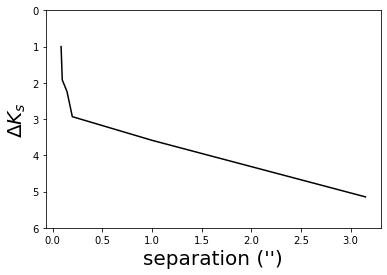

In [10]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(6,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

CPU times: total: 3.47 s
Wall time: 3.47 s


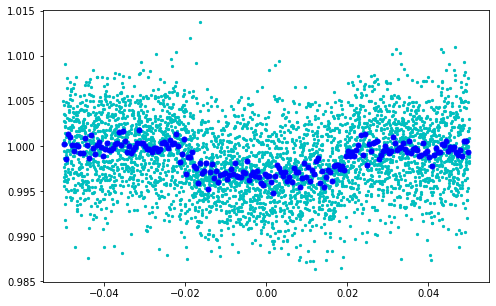

In [11]:
%%time

lc = pd.read_csv(lc_file, header=None)

# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/200
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

plt.scatter(time, flux, s = 5, c = 'c')
plt.scatter(lc.time.value, lc.flux.value, s = 25,  c = 'b')
fig=plt.gcf()
fig.set_size_inches(8,5)

In [12]:
FPPs = np.zeros(6)
NFPPs = np.zeros(6)
for i in range(6):
    target.calc_probs(time = lc.time.value, 
                      flux_0 = lc.flux.value, 
                      flux_err_0 = np.mean(lc.flux_err.value), 
                      P_orb = P_orb,
                      contrast_curve_file = contrastcurve_file,
                      filt = band,
                      exptime = 0.0013888888888889,
                      parallel=True)
                      
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP
    print("FPP = ", target.FPP)
    print("NFPP = ", target.NFPP)

Calculating TP scenario probabilitiey for 277634430.
Calculating EB and EBx2P scenario probabilities for 277634430.
Calculating PTP scenario probability for 277634430.
Calculating PEB and PEBx2P scenario probabilities for 277634430.
Calculating STP scenario probability for 277634430.
Calculating SEB and SEBx2P scenario probabilities for 277634430.
Calculating DTP scenario probability for 277634430.
Calculating DEB and DEBx2P scenario probabilities for 277634430.
Calculating BTP scenario probability for 277634430.
Calculating BEB and BEBx2P scenario probabilities for 277634430.
FPP =  1.1465985135794554e-06
NFPP =  0.0
Calculating TP scenario probabilitiey for 277634430.
Calculating EB and EBx2P scenario probabilities for 277634430.
Calculating PTP scenario probability for 277634430.
Calculating PEB and PEBx2P scenario probabilities for 277634430.
Calculating STP scenario probability for 277634430.
Calculating SEB and SEBx2P scenario probabilities for 277634430.
Calculating DTP scenario

In [13]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  3.382688543296375e-05
NFPP =  0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,277634430,TP,0.212100,0.241857,2.326021,88.002654,0.652426,0.630064,220.977353,1.611900,0.000000,0.000000,8.546867e-01
1,277634430,EB,0.212100,0.241857,2.326021,85.072896,1.773805,0.101923,53.493602,0.000000,0.191777,0.222470,2.207334e-128
2,277634430,EBx2P,0.212100,0.241857,4.652043,87.943921,1.085061,0.597678,202.496901,0.000000,0.207138,0.236487,4.921006e-23
3,277634430,PTP,0.212100,0.241857,2.326021,88.517930,0.463824,0.186213,185.983987,1.902256,0.000000,0.000000,2.195524e-06
4,277634430,PEB,0.212100,0.241857,2.326021,85.122977,1.896791,0.063518,13.083541,0.000000,0.199559,0.229598,6.025706e-120
5,277634430,PEBx2P,0.212100,0.241857,4.652043,88.191785,0.697480,0.621865,179.550913,0.000000,0.204629,0.234211,3.441069e-14
6,277634430,STP,0.122194,0.149678,2.326021,89.574068,0.204596,0.516219,222.270153,2.262797,0.000000,0.000000,2.718228e-07
7,277634430,SEB,0.140125,0.170818,2.326021,86.109851,1.864613,0.086478,5.547566,0.000000,0.128981,0.157945,6.264327e-125
8,277634430,SEBx2P,0.164445,0.196426,4.652043,88.328094,0.773754,0.541547,170.522061,0.000000,0.156377,0.188254,2.991971e-18
9,277634430,DTP,0.212100,0.241857,2.326021,88.356790,0.449437,0.302947,169.422735,1.598990,0.000000,0.000000,1.452773e-01


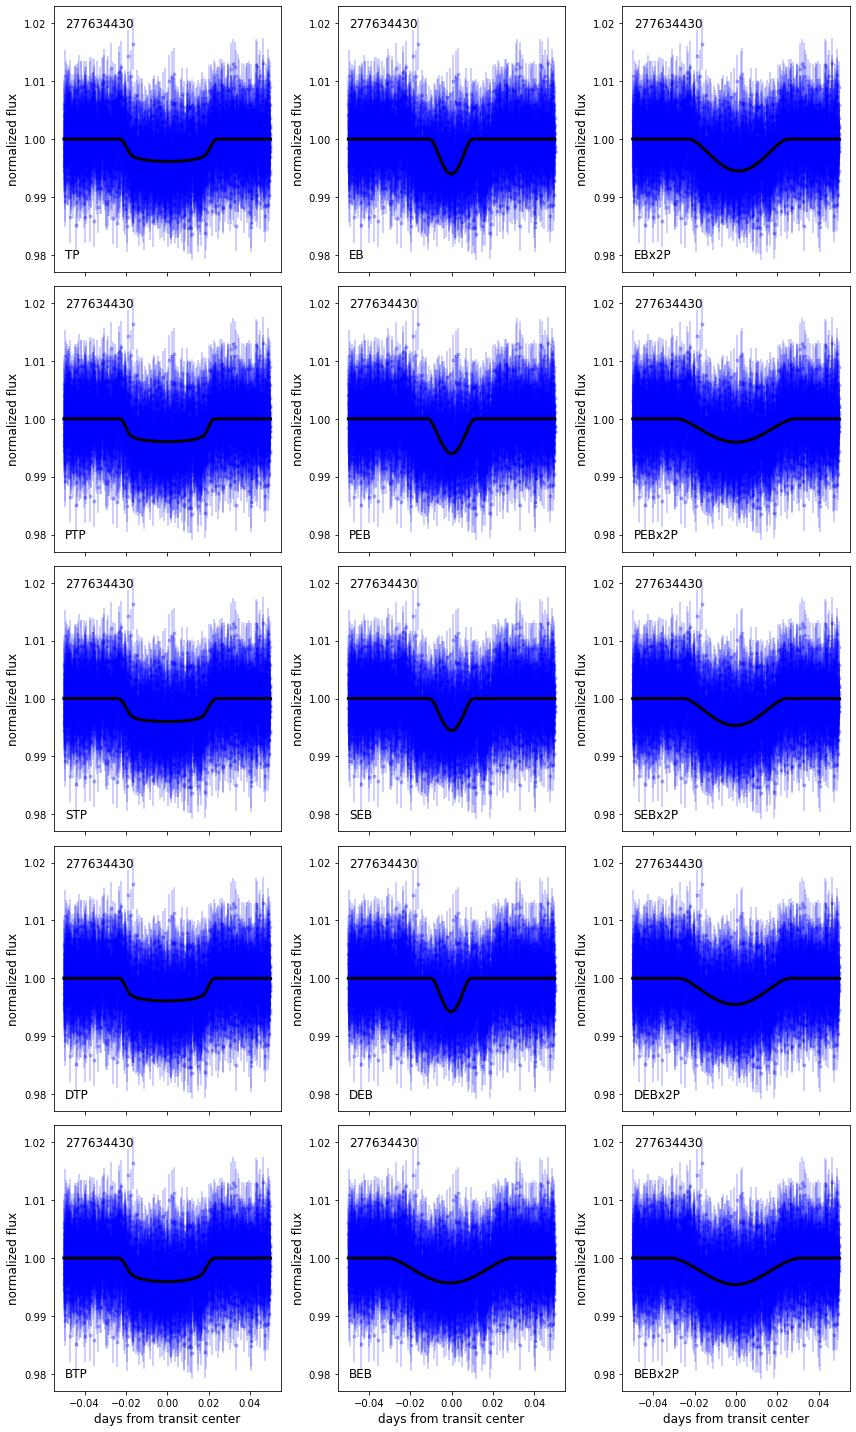

In [14]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))

In [16]:
##SOAR TESS

fpp=np.array([2.5032842465577687e-10,8.289852107001838e-05,1.380941938577962e-08,1.8323953465682052e-10,2.7237635346066824e-06,
1.9859082600603983e-08,9.271721737036387e-07,0.0002348730813220845,1.081528707702617e-07,1.4375946707056997e-05,4.210873440868568e-05,
7.34633531784823e-08,1.1177762049285889e-09,1.905574635197027e-06,1.905574635197027e-06,4.0391422375218866e-05 ,
4.423181820811806e-09 ,
3.015065107581094e-07 ,
1.647281377969989e-08 ,
3.382688543296375e-05])
nfpp=np.array([0])

print(np.mean(fpp),"+/-",np.std(fpp))
print(np.mean(nfpp),"+/-",np.std(nfpp))

2.2823795743559527e-05 +/- 5.309906047290732e-05
0.0 +/- 0.0
